In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MCD3020 - Introducción a Ciencia de Datos

## Tutorial 13: Algoritmos de Regresión.


## Introducción.

Este tutorial tiene como objetivo demostrar algunos algoritmos sencillos de regresión utilizando la librería `sklearn`.<br>

Para ello, utilizaremos el dataset oceanográfico **CalCOFI**, que contiene 60 años de mediciones de temperatura y salinidad del agua, además de datos sobre larvas y especies de peces. <br>

Para más información: https://www.kaggle.com/sohier/calcofi

En este caso, para facilitar la lectura y modelamiento de datos, se ha extraído un conjunto de 1000 registros de este dataset, contenidos en el archivo `calcofi.csv`.

----
***CalCOFI: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity?***

*The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for **documenting climatic cycles in the California Current and a range of biological responses to them.** CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.*

*The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway.* ***Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.***

----

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana7/calcofi.csv')
data.head()

,temp_deg,salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [3]:
data = data[['temp_deg', 'salinity']]


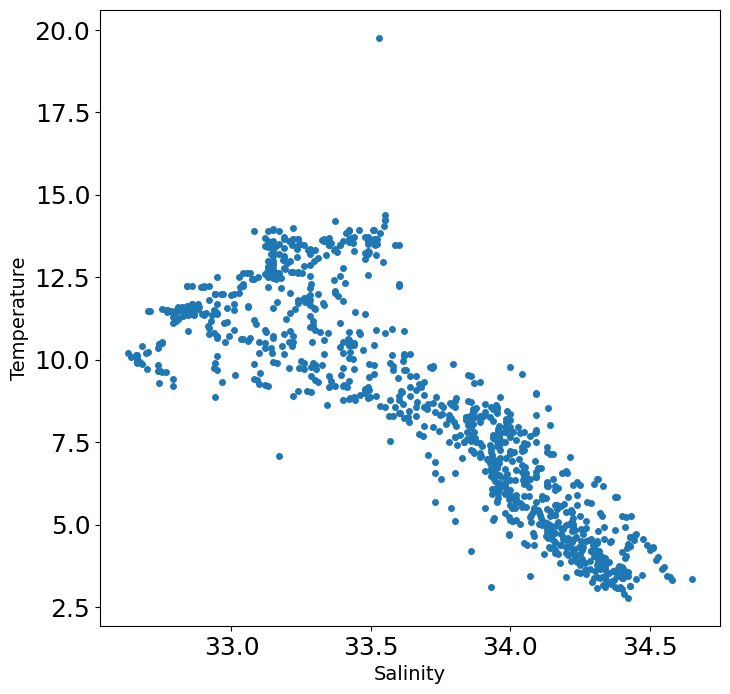

In [4]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
plt.plot(data['salinity'],data['temp_deg'],'o',markersize=4)
ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14);

In [5]:
from sklearn.model_selection import train_test_split

X=data.salinity.values.reshape(-1,1)
y=data.temp_deg.values

#Dividimos el dataframe de entrada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=66)


In [6]:
X_train.shape

(700, 1)

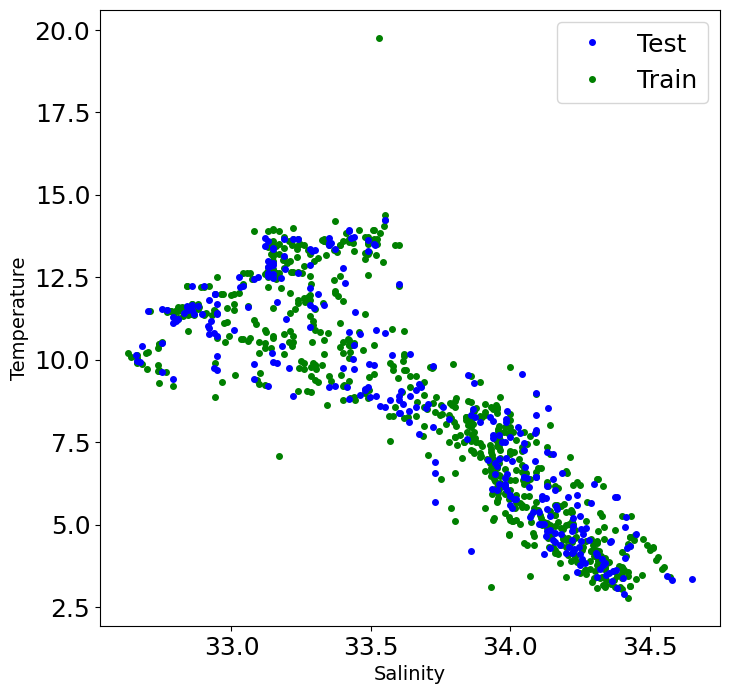

In [7]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
plt.plot(X_test,y_test,'o',markersize=4,color='b',zorder=1,label='Test')
plt.plot(X_train,y_train,'o',markersize=4,color='g',zorder=0,label='Train')

ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)
ax.legend();

## 1. Regresión kNN.

Ahora que tenemos experiencia con `sklearn`, probaremos una regresión KNN  

El método disponible en `sklearn` es `sklearn.neighbors.KNeighborsRegressor`. Su parámetro principal es el  `número de vecinos más cercanos`. Hay otros parámetros como la métrica de distancia (default es la distancia Euclideana). Para ver todos los parámetros, revise la documentación en: [Sklearn kNN Regressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html).

Primero, probaremos usando 2 vecinos más cercanos.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Fijar número de vecinos
k = 3
knnreg = KNeighborsRegressor(n_neighbors=k)

In [9]:
# Entrenar el regresor - asegurarse de que los arreglos de entrada tienen la forma correcta
knnreg.fit(X_train, y_train)

# Evaluar el resultado para el set de entrenamiento usando R^2
r2_train = knnreg.score(X_train, y_train)

#Predicción para datos de prueba
y_predict_test=knnreg.predict(X_test)
r2_test = knnreg.score(X_test, y_test)

print(f'Modelo kNN con %d vecinos:  R^2 (train)=%.2f'%(k,r2_train))
print(f'Modelo kNN con %d vecinos:  R^2 (test)=%.2f'%(k,r2_test))

Modelo kNN con 3 vecinos:  R^2 (train)=0.90
Modelo kNN con 3 vecinos:  R^2 (test)=0.76


In [10]:
from sklearn.metrics import mean_squared_error

y_predict_train=knnreg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)

mse_test=mean_squared_error(y_test, y_predict_test)

print(f'Modelo kNN con %d vecinos:  MSE (train)=%.2f'%(k,mse_train))
print(f'Modelo kNN con %d vecinos:  MSE (test)=%.2f'%(k,mse_test))


Modelo kNN con 3 vecinos:  MSE (train)=1.05
Modelo kNN con 3 vecinos:  MSE (test)=2.37


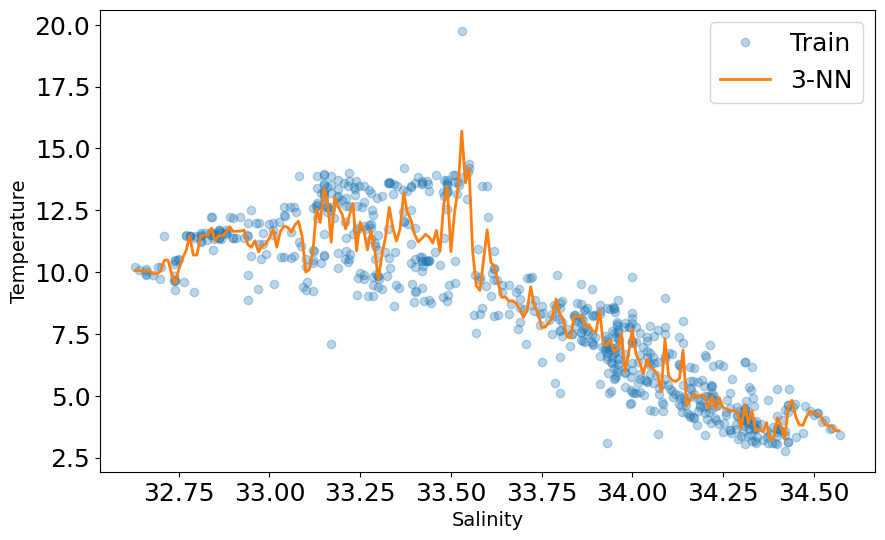

In [11]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(10,6))

#creamos un vector de valores posibles de x
x_model=np.arange(X_train.min(),X_train.max(),0.01).reshape(-1, 1)

#predicciones de y para x_model
y_model=knnreg.predict(x_model)

ax.plot(X_train,y_train,'o',label='Train',alpha=0.3)

ax.plot(x_model,y_model, label="%d-NN"%k,lw=2)
ax.legend()

ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14);


### ¿Cuál es un buen valor para *k*, de manera de no caer en overfitting?

In [12]:
# Diccionario para guardar las regresiones
regdict = {}

# Valores de k a probar
k_list = [1,2,5,10,20,400]

# Iteración para k
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Guardamos regresiones en el diccionario
    regdict[k] = knnreg 

# Print al diccionario para ver que obtuvimos
regdict

{1: KNeighborsRegressor(n_neighbors=1),
 2: KNeighborsRegressor(n_neighbors=2),
 5: KNeighborsRegressor(),
 10: KNeighborsRegressor(n_neighbors=10),
 20: KNeighborsRegressor(n_neighbors=20),
 400: KNeighborsRegressor(n_neighbors=400)}

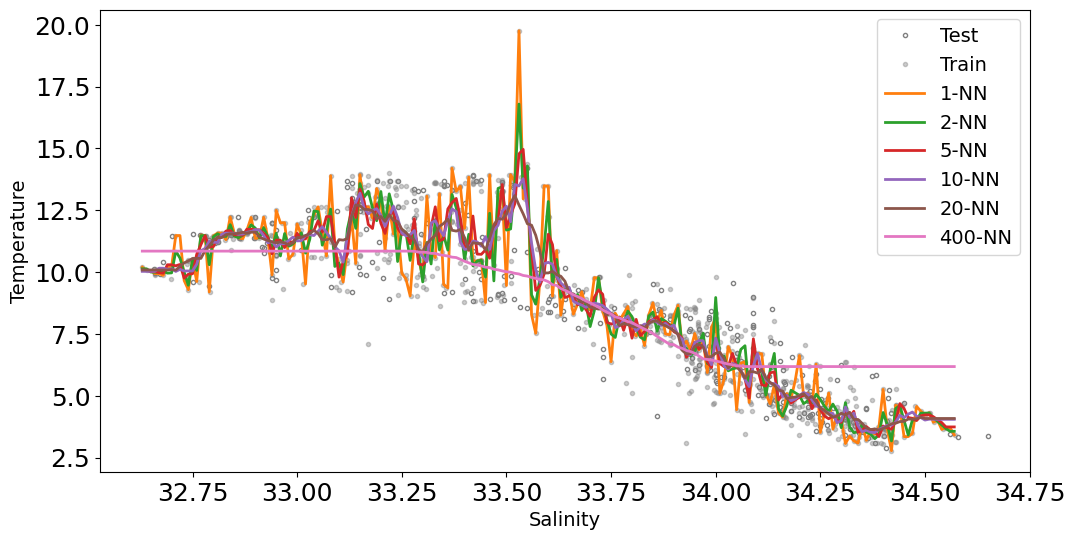

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax.plot(X_test, y_test, 'o',mec='gray',mfc='None',label='Test',markersize=3) 
ax.plot(X_train,y_train, 'o',color='gray',label='Train',markersize=3, alpha=0.4) 

#iteramos sobre los elementos del diccionario
for k, regressor in regdict.items():
    y_model= regressor.predict(x_model) 
    ax.plot(x_model,y_model,'-', label="{}-NN".format(k),lw=2)

ax.set_xlabel('Salinity',fontsize=14)
ax.set_ylabel('Temperature',fontsize=14)

ax.legend(fontsize=14);


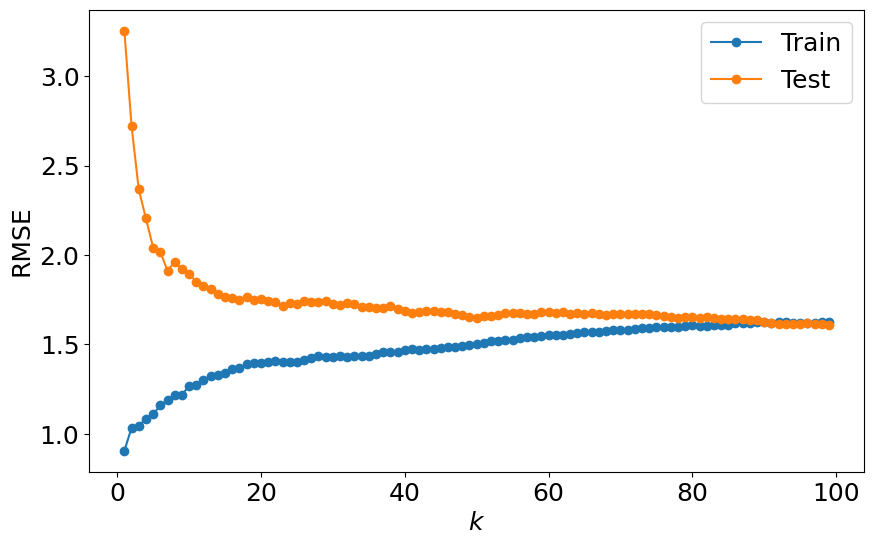

In [14]:
ks = range(1, 100) # Lista de  k's
mse_train = [] # RMSE train
mse_test = [] # RMSE test

for k in ks:
    # Crear modelo KNN 
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit 
    knnreg.fit(X_train, y_train) 
    
    # Calcular MSE train
    y_predict_train=knnreg.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_predict_train)) 
    
    # Calcular MSE test
    y_predict_test=knnreg.predict(X_test)
    mse_test.append(mean_squared_error(y_test, y_predict_test) )

# Plot
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(ks, mse_train,'o-',label='Train')
ax.plot(ks, mse_test,'o-',label='Test')
ax.legend()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'RMSE');

### Ejercicio:
- Repita el gráfico anterior, usando ahora como métrica el coeficiente R^2. ¿Obtiene los mismos resultados?
- De acuerdo a los resultados anteriores, ¿Cuál sería una buena elección para k?

## 2. Regresión Lineal con `sklearn`

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



X=data[['salinity', 'salinity_d']].values#.reshape(-1,1)
y=data.temp_deg.values

#Dividimos el dataframe de entrada
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=66)


linreg=LinearRegression()

linreg.fit(X_train, y_train)

y_pred_train=linreg.predict(X_train)
R2_lineal_train=linreg.score(X_train, y_train)
rmse_train=mean_squared_error(y_train, y_pred_train)

print(r'R^2 (train)',R2_lineal_train)
print('Coeficientes: \n', linreg.coef_[0], linreg.intercept_)
print('RMSE (train)', rmse_train)

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(X_test)
R2_lineal_test=linreg.score(X_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)

print(r'R^2 (test)',R2_lineal_test)
print('RMSE (test)', rmse_test)

R^2 (train) 0.805361342077576
Coeficientes: 
 279.4131256954878 -4594.592375759078
RMSE (train) 2.063350751186549
R^2 (test) 0.8149459425255117
RMSE (test) 1.848984466690055


In [24]:
data['salinity_d'] = data.salinity.apply(lambda x: x**2)
data

,temp_deg,salinity,salinity_d
0,10.50,33.440,1118.233600
1,10.46,33.440,1118.233600
2,10.46,33.437,1118.032969
3,10.45,33.420,1116.896400
4,10.45,33.421,1116.963241
...,...,...,...
995,6.47,33.962,1153.417444
996,5.90,34.020,1157.360400
997,5.25,34.140,1165.539600
998,5.39,34.080,1161.446400


In [28]:
data[['salinity', 'salinity_d']].values

TypeError: 'tuple' object is not callable

In [33]:
linreg.coef_

array([279.4131257 ,  -4.23724429])

In [32]:
linreg.intercept_

-4594.592375759078

AttributeError: 'numpy.ndarray' object has no attribute 'salinity'

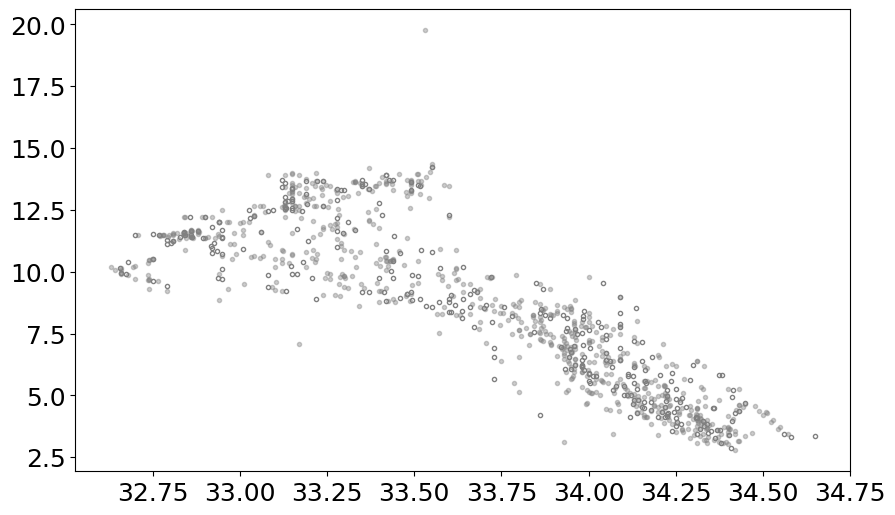

In [17]:
fig1, ax1 = plt.subplots(1,1, figsize=(10,6))

ax1.plot(X_test, y_test, 'o',mec='gray',mfc='None',label='Test',markersize=3) 
ax1.plot(X_train,y_train, 'o',color='gray',label='Train',markersize=3, alpha=0.4) 


xgrid = np.linspace(np.min(X_train.salinity), np.max(X_train.salinity), 100)
ax1.plot(xgrid, linreg.predict(xgrid.reshape(100, 1)),label='Regresión Lineal')
ax1.set_xlabel('Salinity',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=14)

ax1.legend();

## 3. Regresión polinomial con `sklearn`.

En una regresión polinomial, usamos un **modelo lineal** para estimar una **función no lineal** (i.e., una función con términos polinomiales). Por ejemplo, 

$y = \beta_0 + \beta_1x + \beta_2x_{2}$

Es un modelo _lineal_ porque resolvemos una ecuación lineal para obtener los coeficientes $\beta$.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)

X_train_poly = transformer.fit_transform(X_train); # TRANSFORMA a polynomial features
X_train_poly

array([[1.00000000e+00, 3.41800000e+01, 1.16827240e+03],
       [1.00000000e+00, 3.36900000e+01, 1.13501610e+03],
       [1.00000000e+00, 3.35870000e+01, 1.12808657e+03],
       ...,
       [1.00000000e+00, 3.31300000e+01, 1.09759690e+03],
       [1.00000000e+00, 3.34900000e+01, 1.12158010e+03],
       [1.00000000e+00, 3.40400000e+01, 1.15872160e+03]])

In [ ]:
reg_poly = LinearRegression().fit(X_train_poly, y_train)
y_pred_train = reg_poly.predict(X_train_poly)

X_test_poly = transformer.fit_transform(X_test) # TRANSFORMS it to polynomial features
y_pred_test = reg_poly.predict(X_test_poly)


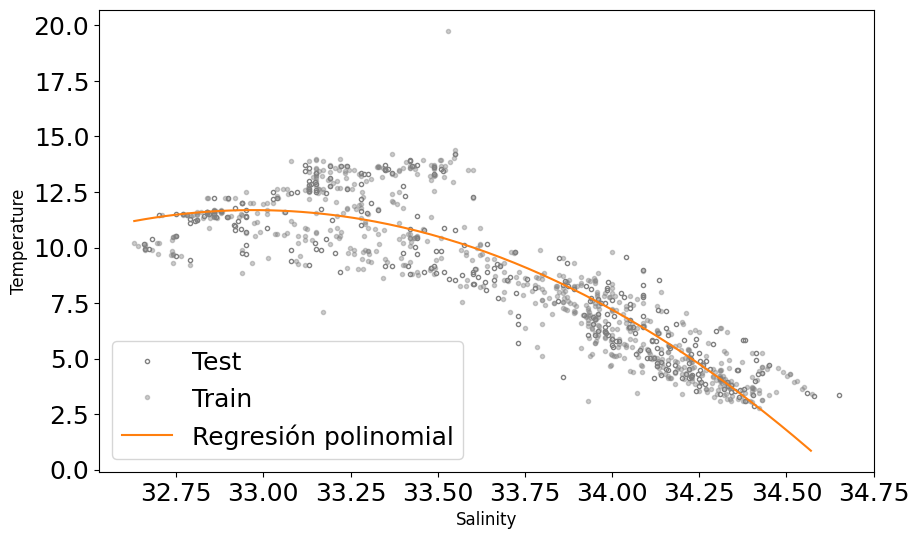

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(X_test, y_test, 'o',mec='gray',mfc='None',label='Test',markersize=3) 
ax.plot(X_train,y_train, 'o',color='gray',label='Train',markersize=3, alpha=0.4) 

y_model_poly=reg_poly.predict(transformer.fit_transform(x_model))

ax.plot(x_model,y_model_poly,label='Regresión polinomial')
ax.set_xlabel("Salinity", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.legend();

### Ejercicio:

- Compare los modelos de regresión lineal utilizando polinomios de distinto grado. ¿Cuándo se da el caso de underfitting u overfitting?

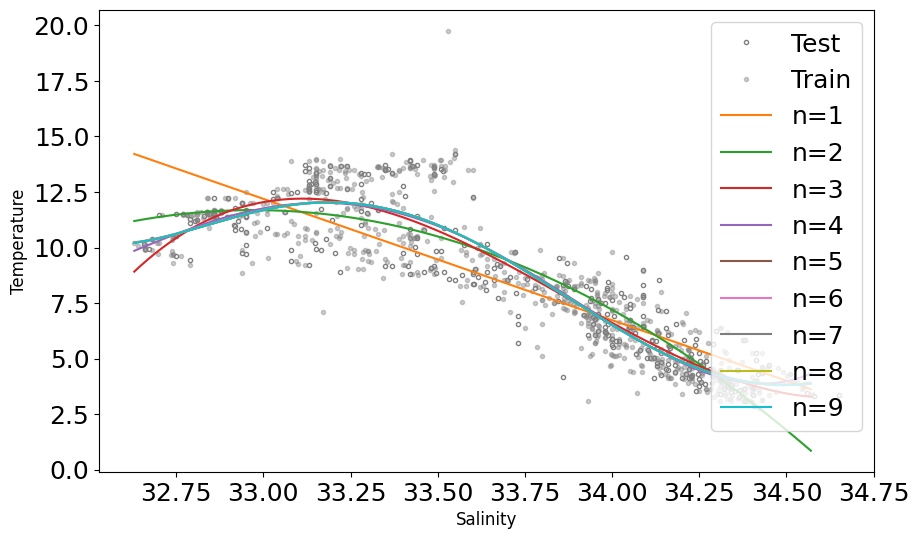

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(X_test, y_test, 'o',mec='gray',mfc='None',label='Test',markersize=3) 
ax.plot(X_train,y_train, 'o',color='gray',label='Train',markersize=3, alpha=0.4) 


npoly=np.arange(1,10,1)

error_test=[]
error_train=[]

    
for n in npoly:
    transformer = PolynomialFeatures(n, include_bias=False)

    X_train_poly = transformer.fit_transform(X_train); 

    reg_poly = LinearRegression().fit(X_train_poly, y_train)
    y_pred_train = reg_poly.predict(X_train_poly)

    X_test_poly = transformer.fit_transform(X_test) # TRANSFORMS it to polynomial features
    y_pred_test = reg_poly.predict(X_test_poly)

    rmse_train=mean_squared_error(y_train, y_pred_train)
    rmse_test=mean_squared_error(y_test, y_pred_test)
    
    error_test.append(rmse_test)
    error_train.append(rmse_train)
    
    y_model_poly=reg_poly.predict(transformer.fit_transform(x_model))

    ax.plot(x_model,y_model_poly,label='n=%d'%n)

ax.set_xlabel("Salinity", fontsize=12)
ax.set_ylabel("Temperature", fontsize=12)
ax.legend();



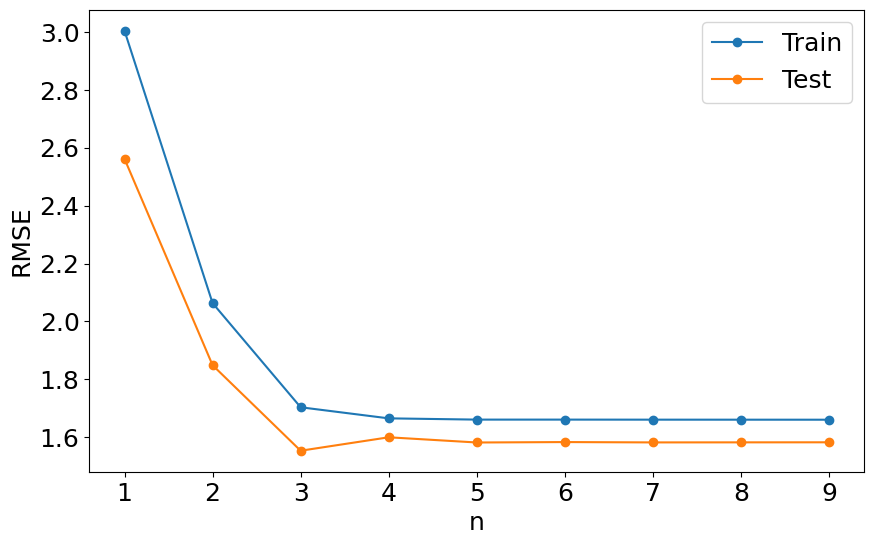

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(npoly,error_train,'o-',label='Train')
ax.plot(npoly,error_test,'o-',label='Test')

ax.set_xlabel("n")
ax.set_ylabel("RMSE")
ax.legend();

